# Prediction of CKD in Patients given medical data

## Project Setup and Preamble

In [4]:
import arff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys

In [5]:
# Code for saving any diagrams, graphs, etc.

ROOT_DIRECTORY = "."
IMAGES_PATH = os.path.join(ROOT_DIRECTORY, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_figure(filename, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, filename + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
plt.rcParams["figure.dpi"] = 150

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import Data

In [8]:
FILE_PATH = r".\data\chronic_kidney_disease_full.arff"

In [9]:
dataset = arff.load(fp=open(FILE_PATH, mode="r"))

In [10]:
pprint(dataset)

Pretty printing has been turned OFF


In [11]:
print(dataset['description'])

1. Title: Early stage of Indians Chronic Kidney Disease(CKD)

2. Source Information:
  (a) Source:
			Dr.P.Soundarapandian.M.D.,D.M
		     (Senior Consultant Nephrologist),
			Apollo  Hospitals,
			Managiri,
			Madurai Main Road,
			Karaikudi,
			Tamilnadu,
			India.
  (b) Creator:
			L.Jerlin Rubini(Research Scholar)
			Alagappa University
			EmailId   :jel.jerlin@gmail.com
			ContactNo :+91-9597231281
  (c) Guided by:
			Dr.P.Eswaran Assistant Professor,
			Department of Computer Science and Engineering,
			Alagappa University,
			Karaikudi,
			Tamilnadu,
			India.
			Emailid:eswaranperumal@gmail.com
  (d) Date     : july 2015

3.Relevant Information:
			age		-	age	
			bp		-	blood pressure
			sg		-	specific gravity
			al		-   	albumin
			su		-	sugar
			rbc		-	red blood cells
			pc		-	pus cell
			pcc		-	pus cell clumps
			ba		-	bacteria
			bgr		-	blood glucose random
			bu		-	blood urea
			sc		-	serum creatinine
			sod		-	sodium
			pot		-	potassium
			hemo		-	hemoglobin
			pcv		-	pack

In [12]:
data = np.array(dataset["data"])
data

array([[48.0, 80.0, '1.020', ..., 'no', 'no', 'ckd'],
       [7.0, 50.0, '1.020', ..., 'no', 'no', 'ckd'],
       [62.0, 80.0, '1.010', ..., 'no', 'yes', 'ckd'],
       ...,
       [12.0, 80.0, '1.020', ..., 'no', 'no', 'notckd'],
       [17.0, 60.0, '1.025', ..., 'no', 'no', 'notckd'],
       [58.0, 80.0, '1.025', ..., 'no', 'no', 'notckd']], dtype=object)

In [13]:
HEADERS = np.array(list(zip(*dataset["attributes"]))[0])
HEADERS

array(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn',
       'dm', 'cad', 'appet', 'pe', 'ane', 'class'], dtype='<U5')

In [14]:
TYPE_NAMES = np.array(list(zip(*dataset["attributes"]))[1])
# TYPE_NAMES
# print(*zip(HEADERS,TYPE_NAMES), sep='\n')

TYPE_DICT = {name:typ for name,typ in zip(HEADERS,TYPE_NAMES)}
TYPE_DICT

# hello = pd.DataFrame(TYPE_DICT)

{'age': 'NUMERIC', 'bp': 'NUMERIC', 'sg': ['1.005', '1.010', '1.015', '1.020', '1.025'], 'al': ['0', '1', '2', '3', '4', '5'], 'su': ['0', '1', '2', '3', '4', '5'], 'rbc': ['normal', 'abnormal'], 'pc': ['normal', 'abnormal'], 'pcc': ['present', 'notpresent'], 'ba': ['present', 'notpresent'], 'bgr': 'NUMERIC', 'bu': 'NUMERIC', 'sc': 'NUMERIC', 'sod': 'NUMERIC', 'pot': 'NUMERIC', 'hemo': 'NUMERIC', 'pcv': 'NUMERIC', 'wbcc': 'NUMERIC', 'rbcc': 'NUMERIC', 'htn': ['yes', 'no'], 'dm': ['yes', 'no'], 'cad': ['yes', 'no'], 'appet': ['good', 'poor'], 'pe': ['yes', 'no'], 'ane': ['yes', 'no'], 'class': ['ckd', 'notckd']}

In [15]:
# Changing the 'TYPES' list into pandas types, manually by observation

TYPES = [int, int, float, int, int,            # Age, BP, SG, AL, SU
         bool, bool, bool, bool, int,          # RBC, PC, PCC, BA, BGR
         int, float, int, float, float,        # BU, SC, SOD, POT, HEMO
         int, int, float, bool, bool,          # PCV, WBCC, RBCC, HTN, DM
         bool, bool, bool, bool, bool]         # CAD, APPET, PE, ANE, CLASS

# Need to use 'float' type for integer data, b/c nan is a float
# Will convert object type into boolean later
TYPES2 = [float, float, float, float, float,              # Age, BP, SG, AL, SU
         object, object, object, object, float,           # RBC, PC, PCC, BA, BGR
         float, float, float, float, float,               # BU, SC, SOD, POT, HEMO
         float, float, float, object, object,             # PCV, WBCC, RBCC, HTN, DM
         object, object, object, object, object]          # CAD, APPET, PE, ANE, CLASS

TYPE_MAPPINGS = {header:typ for header, typ in zip(HEADERS,TYPES2)}
#TYPE_MAPPINGS

## Split Data

- training and test sets
- need to do stratified sampling (since dataset is small)

In [65]:
ckd = pd.DataFrame(data=data, columns=HEADERS)
ckd.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,None,normal,notpresent,notpresent,121,36,1.2,None,None,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,None,normal,notpresent,notpresent,None,18,0.8,None,None,11.3,38,6000,None,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,None,None,9.6,31,7500,None,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,None,None,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,None,None,notpresent,notpresent,74,25,1.1,142,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68,70,1.010,0,0,None,normal,notpresent,notpresent,100,54,24,104,4,12.4,36,None,None,no,no,no,good,no,no,ckd
7,24,None,1.015,2,4,normal,abnormal,notpresent,notpresent,410,31,1.1,None,None,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,60,1.9,None,None,10.8,33,9600,4,yes,yes,no,good,no,yes,ckd
9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


(array([250.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 150.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)

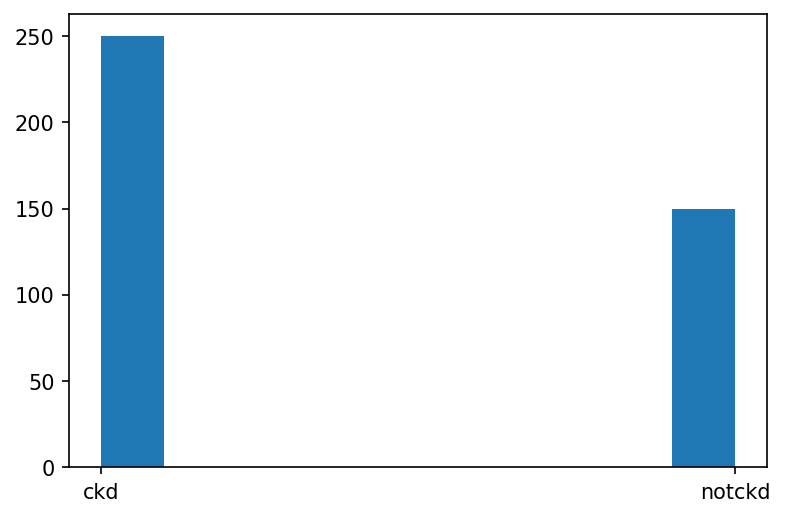

In [53]:
plt.hist(ckd["class"])

In [30]:
ckd["class"].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
X = ckd.drop("class", axis=1)
y = ckd["class"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [39]:
y_train.value_counts()

ckd       198
notckd    122
Name: class, dtype: int64

In [41]:
y_test.value_counts()

ckd       52
notckd    28
Name: class, dtype: int64

In [54]:
from sklearn.model_selection import StratifiedShuffleSplit

In [55]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

In [56]:
for train_index, test_index in split.split(X, y):
    strat_train_set = X[train_index]
    strat_test_set = y[test_index]

KeyError: "None of [Int64Index([380,  56, 126, 371, 333, 347, 388, 132, 279, 127,\n            ...\n            119, 268,   3,  34, 310, 154, 274, 192,  85,   8],\n           dtype='int64', length=320)] are in the [columns]"

## EDA

- Need to change Dtypes
- Only do this with the X_train, y_train splits.
- Look for correlations
- consider using scatter_matrix
- consider attribute combinations

In [67]:
ckd = ckd.astype(dtype=TYPE_MAPPINGS)

In [62]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     391 non-null    object
 1   bp      388 non-null    object
 2   sg      353 non-null    object
 3   al      354 non-null    object
 4   su      351 non-null    object
 5   rbc     248 non-null    object
 6   pc      335 non-null    object
 7   pcc     396 non-null    object
 8   ba      396 non-null    object
 9   bgr     356 non-null    object
 10  bu      381 non-null    object
 11  sc      383 non-null    object
 12  sod     313 non-null    object
 13  pot     312 non-null    object
 14  hemo    348 non-null    object
 15  pcv     329 non-null    object
 16  wbcc    294 non-null    object
 17  rbcc    269 non-null    object
 18  htn     398 non-null    object
 19  dm      398 non-null    object
 20  cad     398 non-null    object
 21  appet   399 non-null    object
 22  pe      399 non-null    ob

In [61]:
ckd.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391.0,388.0,353,354,351,248,335,396,396,356.0,381.0,383.0,313.0,312.0,348.0,329.0,294.0,269.0,398,398,398,399,399,399,400
unique,76.0,10.0,5,6,6,2,2,2,2,146.0,118.0,84.0,34.0,40.0,115.0,42.0,89.0,45.0,2,2,2,2,2,2,2
top,60.0,80.0,1.020,0,0,normal,normal,notpresent,notpresent,99.0,46.0,1.2,135.0,3.5,15.0,52.0,9800.0,5.2,no,no,no,good,no,no,ckd
freq,19.0,116.0,106,199,290,201,259,354,374,10.0,15.0,40.0,40.0,30.0,16.0,21.0,11.0,18.0,251,261,364,317,323,339,250


In [72]:
corr_matrix = ckd.corr()
corr_matrix["bp"].sort_values(ascending=False)

bp      1.000000
su      0.222576
bu      0.188517
al      0.160689
bgr     0.160193
age     0.159480
sc      0.146222
pot     0.075151
wbcc    0.029753
sod    -0.116422
sg     -0.218836
rbcc   -0.261936
hemo   -0.306540
pcv    -0.326319
Name: bp, dtype: float64

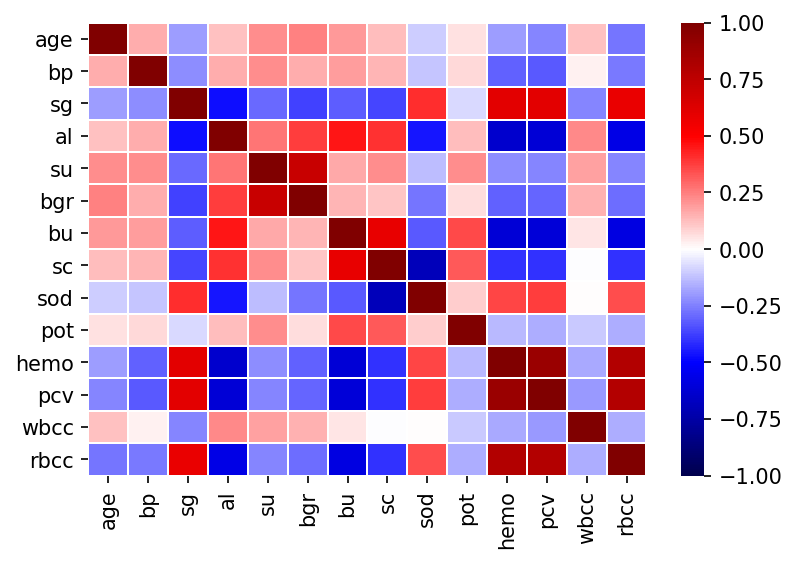

In [73]:
sns.heatmap(ckd.corr(), cmap="seismic", yticklabels=True, linecolor="white", linewidths=.5, vmin=-1.0, vmax=1.0)
# , vmin=0.0, vmax=1.0

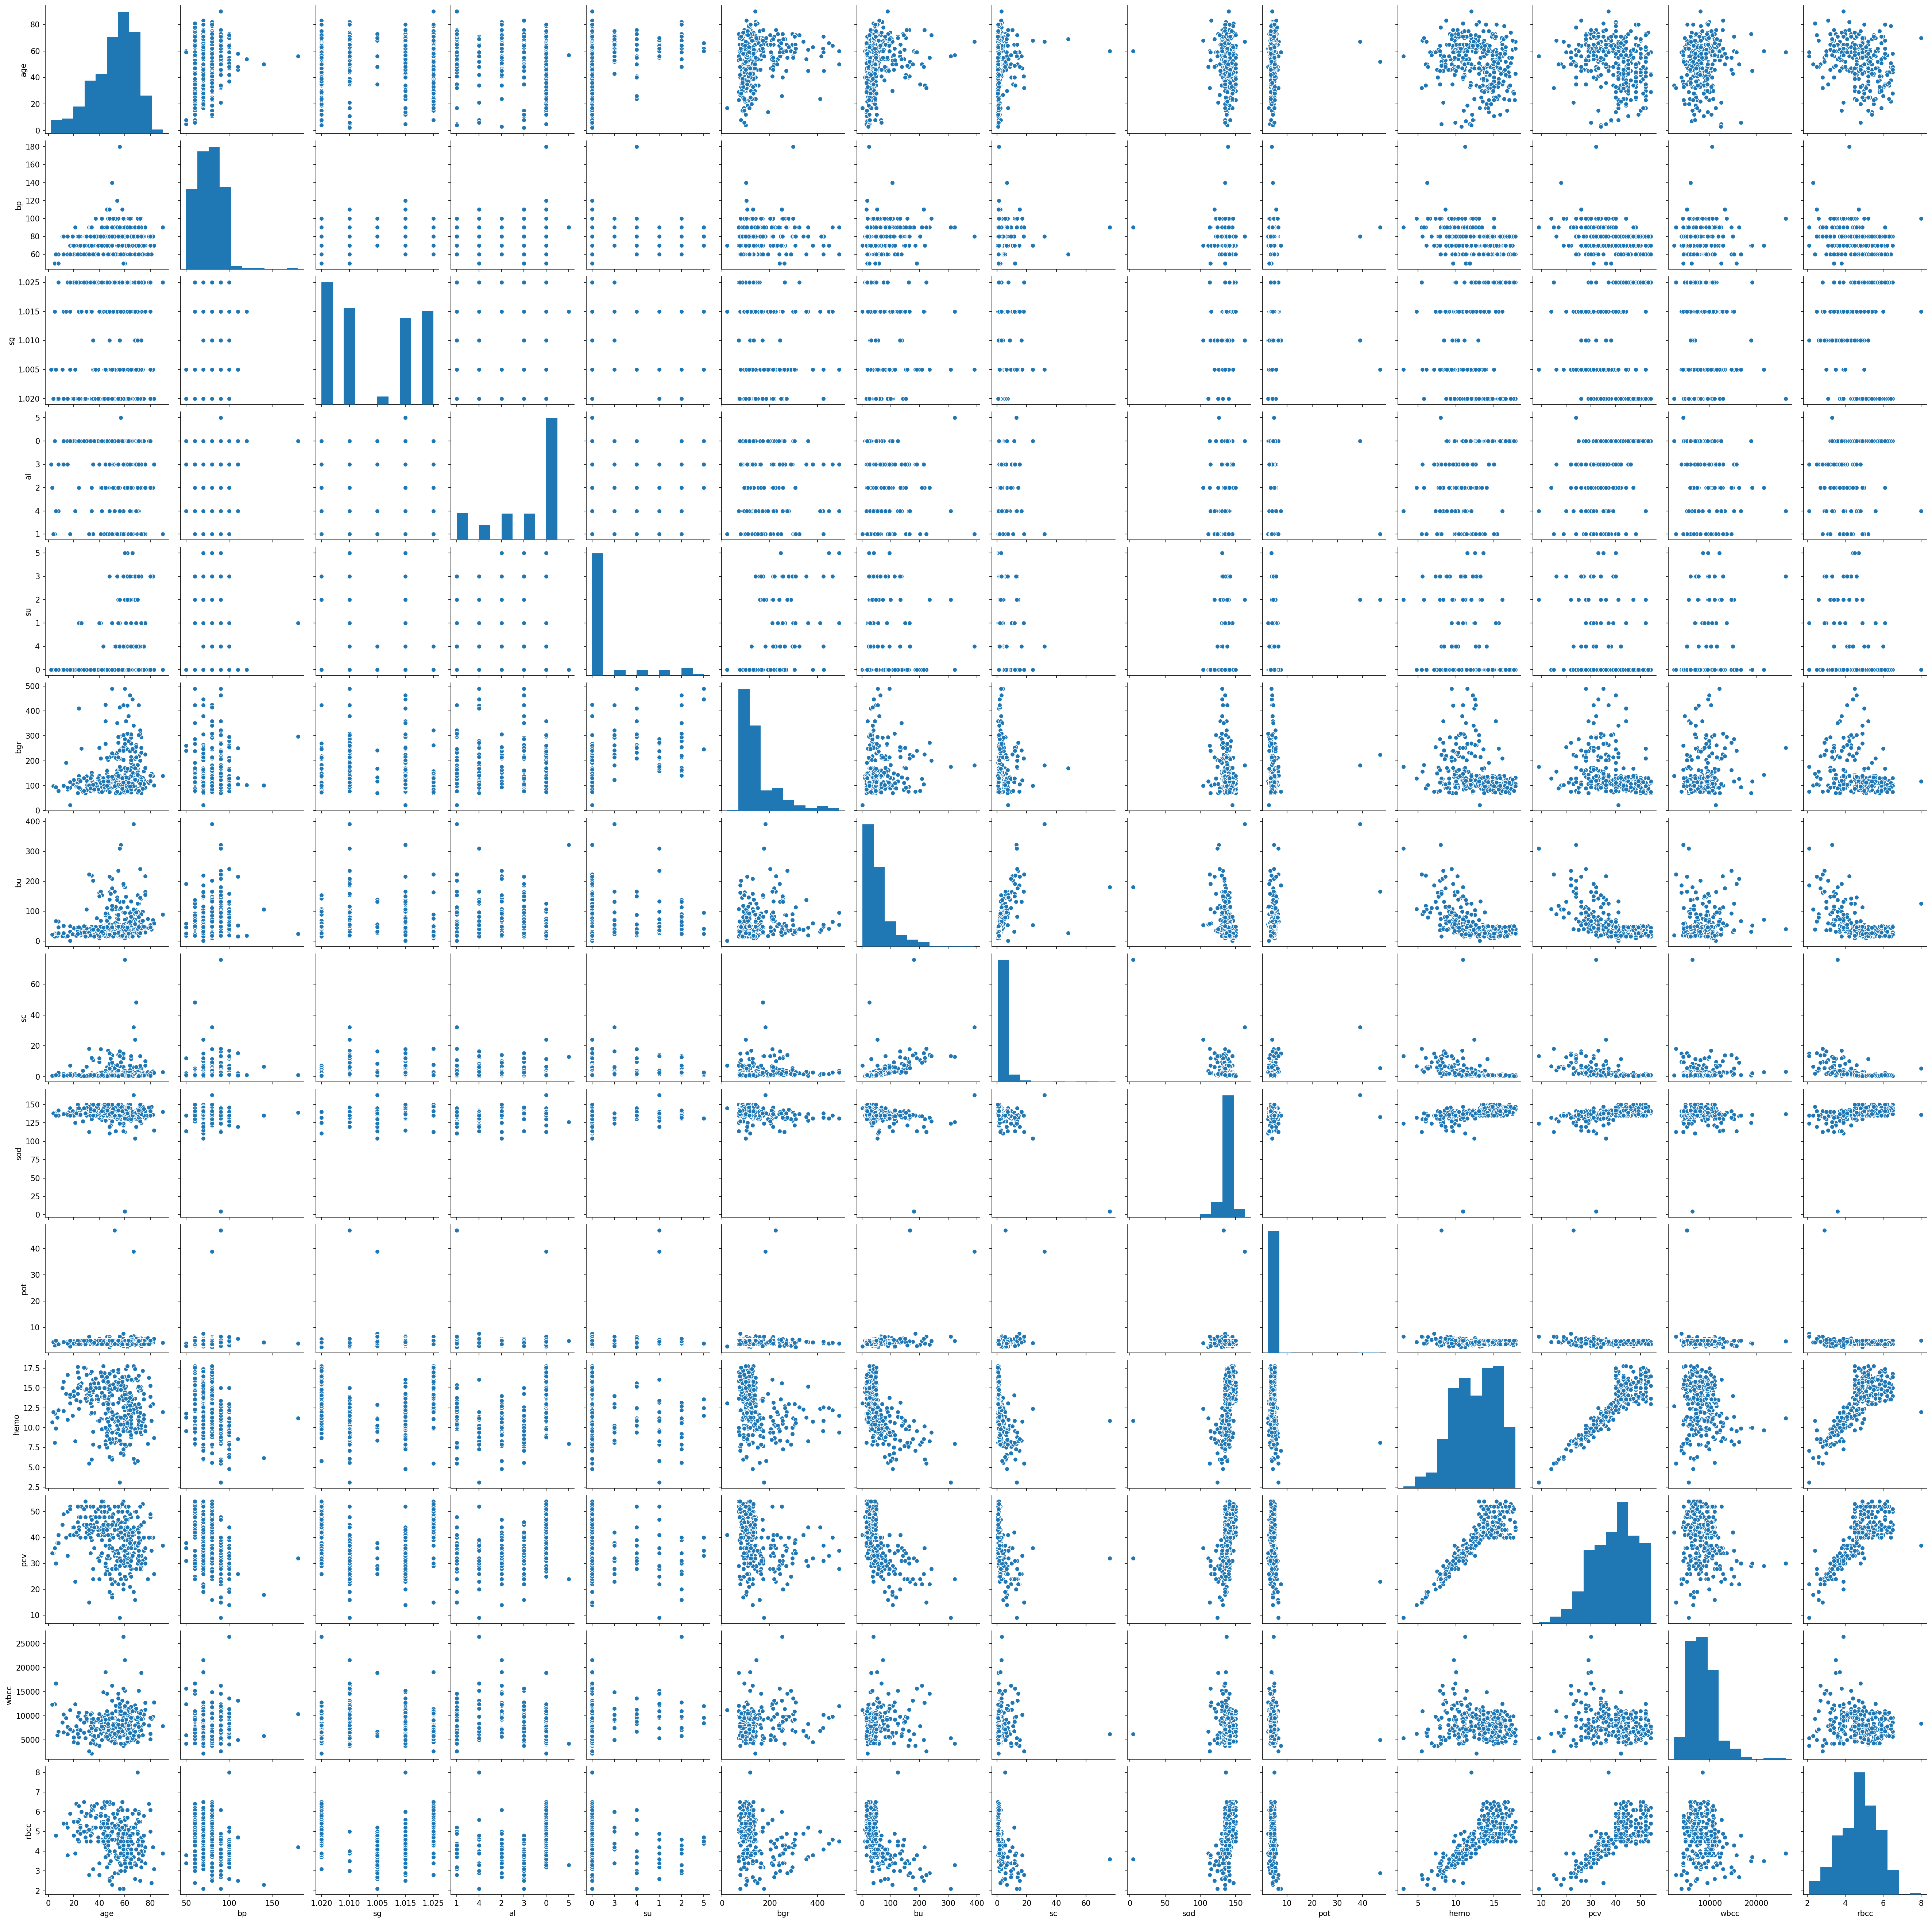

In [22]:
sns.pairplot(ckd)

In [23]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [24]:
# sns.distplot(ckd[fields[0]])
# sns.distplot(ckd[fields[1]])
# sns.distplot(ckd[fields[2]])

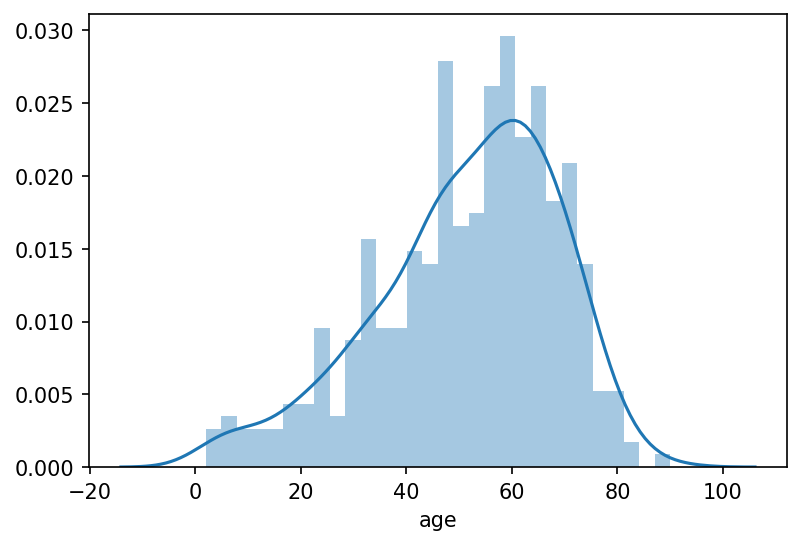

In [25]:
fields = ['age', 'bp', 'rbc_normal', 'bu', 'sc', 'sod']

# for field in fields:
#     sns.distplot(ckd[field])

sns.distplot(ckd[fields[0]], bins=30)


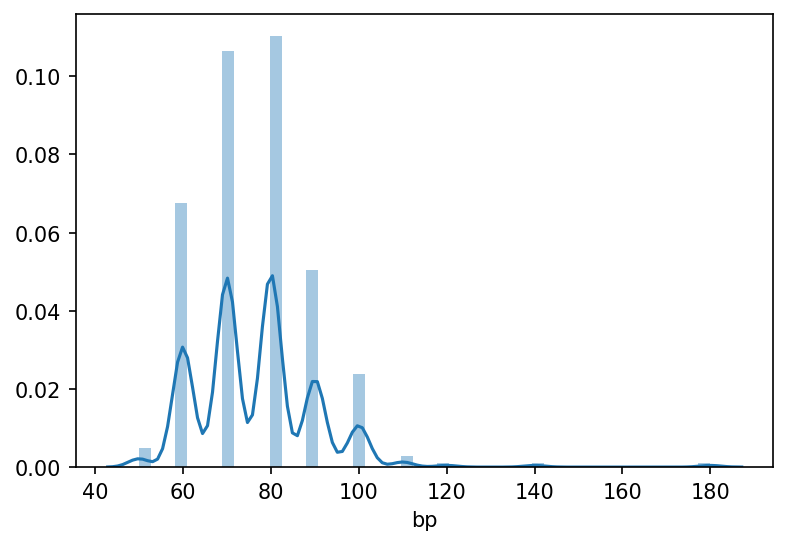

In [26]:
sns.distplot(ckd[fields[1]])


In [27]:
sns.distplot(ckd[fields[2]])

KeyError: 'rbc_normal'

In [ ]:
sns.jointplot(x="age", y="bp", data=ckd)

In [ ]:
sns.jointplot(x="htn_yes", y="bp", data=ckd)

## Data Cleaning

- deal with null values (can impute with median?)
- one-hot encoding on categorical attributes

In [ ]:
# Doing one-hot encoding for the (binary) categorical variables

atts_dict = dict(dataset['attributes'])
for col in ckd.select_dtypes(include=['object']).columns:
    
    new_values = []
    positive, negative = atts_dict[col]
    
    for item in ckd[col]:
        if item == positive:
            new_values.append("1")
        elif item == negative:
            new_values.append("0")
        else:
            new_values.append(item)

    ckd[col+"_"+positive] = pd.Series(data=new_values, dtype=float)
    ckd.drop(col, axis=1, inplace=True)
